In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# 加载数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_ori=x_test
# 数据预处理
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 定义 ModelCheckpoint 回调函数
checkpoint = tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss')

# 训练模型
history = model.fit(x_train, y_train, 
                    epochs=8, 
                    batch_size=128, 
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint]
                    )
# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/8
469/469 [==============================] - 4s 8ms/step - loss: 0.2841 - accuracy: 0.9173 - val_loss: 0.1356 - val_accuracy: 0.9616
Epoch 2/8
469/469 [==============================] - 3s 6ms/step - loss: 0.1212 - accuracy: 0.9650 - val_loss: 0.0969 - val_accuracy: 0.9697
Epoch 3/8
469/469 [==============================] - 2s 4ms/step - loss: 0.0831 - accuracy: 0.9760 - val_loss: 0.0786 - val_accuracy: 0.9747
Epoch 4/8
469/469 [==============================] - 2s 4ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 5/8
469/469 [==============================] - 2s 4ms/step - loss: 0.0504 - accuracy: 0.9852 - val_loss: 0.0647 - val_accuracy: 0.9796
Epoch 6/8
469/469 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0654 - val_accuracy: 0.9789
Epoch 7/8
469/469 [==============================] - 2s 4ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0603 - val_accuracy: 0.9810
Epoch 8/8
313

预测结果： 6


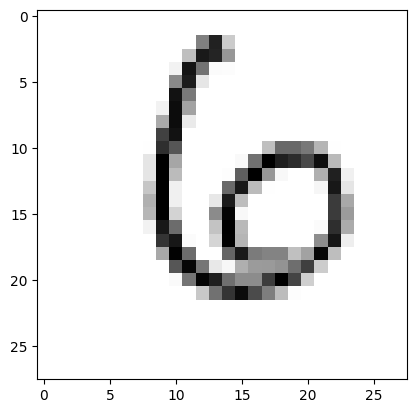

In [6]:
# 预测第10个测试数据的结果
predictions = model.predict(np.array([x_test[100]]))
print("预测结果：", np.argmax(predictions))

# 绘制第10个测试数据的图形
plt.imshow(x_test_ori[100], cmap=plt.cm.binary)
plt.show()

